# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time
import matplotlib.ticker as ticker

import scipy.io.wavfile
from IPython.display import Audio

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

In [3]:
# Variant 1
M = 4
x = np.ones(M)
h = x
print(x, h)

[1. 1. 1. 1.] [1. 1. 1. 1.]


In [7]:
def plot_signal(signal, index, variable, index_range=3):
    ax=plt.subplot(1, 3, index)
    plt.stem(signal)
    plt.xlabel("$k$")
    plt.ylabel("$"+variable+"[k]$")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.grid()
    
def plot_filter_input_output_signal(x, h, y):
    plt.figure(figsize=[10, 3])
    plot_signal(signal=x, index=1, variable='x')
    plot_signal(signal=h, index=2, variable='h')
    plot_signal(signal=y, index=3, variable='y')
    plt.tight_layout()

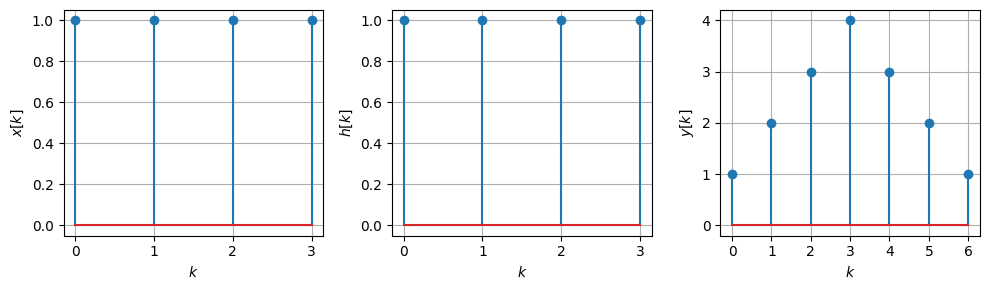

In [10]:
y=signal.convolve(x, h)
plot_filter_input_output_signal(x, h, y)

## Задача 1.2. Эффективное вычисление свертки 




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ | 
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



In [19]:
N = 2**17
n_0 = 128

tmp_array = (2 * np.pi * n_0 / N) * np.arange(N)
x = np.cos(tmp_array)
h = np.sin(tmp_array)
x

array([1.        , 0.99998118, 0.9999247 , ..., 0.99983058, 0.9999247 ,
       0.99998118])

In [20]:
# standart
t0 = time.time()
y1 = signal.convolve(x, h, method='direct')
t = time.time()
print(f"time: {t-t0}")

# fft
t0 = time.time()
X = np.fft.fft(x, N)
H = np.fft.fft(h, N)
Y = X * H
y2 = np.fft.ifft(Y, N).real
t = time.time()
print(f"time: {t-t0}")

# convolve fft
t0 = time.time()
y3 = signal.convolve(x, h, method='fft')
t = time.time()
print(f"time: {t-t0}")

time: 14.342767000198364
time: 0.022805213928222656
time: 0.023741483688354492


In [22]:
print(y1[:6])
print(y2[:6])
print(y3[:6])


[0.         0.00613588 0.01840731 0.03681346 0.06135307 0.09202441]
[-2.05606567e-09  4.02121336e+02  8.04227533e+02  1.20630345e+03
  1.60833395e+03  2.01030390e+03]
[-2.08264395e-13  6.13588465e-03  1.84073074e-02  3.68134598e-02
  6.13530713e-02  9.20244095e-02]


# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 |
| $N$ |100 |140 |130 |100 |140 | 115 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

По опредлению, импульсная характеристика является реакцией на единичный импульс
Если $x[k]=\mathbf{1} [k]$, то $y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} \mathbf{1} [k-m]$. Тогда 

$$h[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} \mathbf{1} [k-m]$$

In [5]:
M1 = 9
M2 = 29
K = 35
N = 100
h1 = np.ones(M1) / M1
h2 = np.ones(M2) / M2

k = np.arange(N)
x = np.sin(2 * np.pi / K * k)
x_noise = x + np.random.normal(0, 0.1, N)

y1 = signal.convolve(x_noise, h1)
y2 = signal.convolve(x_noise, h2)

In [6]:
def plot_signal(k, x, x_noise, y, N, M):
    plt.figure(figsize=[16, 16], dpi=100)
    plt.subplot(3, 1, 1)
    plt.title("Сигнал до фильтрации без шума")
    plt.stem(k, x, use_line_collection=True)
    plt.xticks([M, N/2, N, M+N-1])
    plt.yticks(np.arange(-max(x), max(x), step=max(x)/8))
    plt.grid()
    plt.ylabel("x[k]")
    plt.xlabel("k")
    
    plt.subplot(3, 1, 2)
    plt.title("Сигнал до фильтрации")
    plt.stem(k, x_noise, use_line_collection=True)
    plt.xticks([M, N/2, N, M+N-1])
    plt.yticks(np.arange(-max(x_noise), max(x_noise), step=max(x_noise)/8))
    plt.grid()
    plt.ylabel("x_noise[k]")
    plt.xlabel("k")

    plt.subplot(3, 1, 3)
    plt.title("Сигнал после фильтрации")
    plt.stem(np.arange(y.size), y, use_line_collection=True)
    plt.xticks([M, N/2, N, M+N-1])
    plt.yticks(np.arange(-max(y), max(y), step=max(y)/8))
    plt.ylabel("y[k]")
    plt.xlabel("k")
    plt.grid()
    plt.tight_layout()

C:\Users\alexa\AppData\Local\Temp\ipykernel_1108\3645037644.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, x, use_line_collection=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_1108\3645037644.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, x_noise, use_line_collection=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_1108\3645037644.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collecti

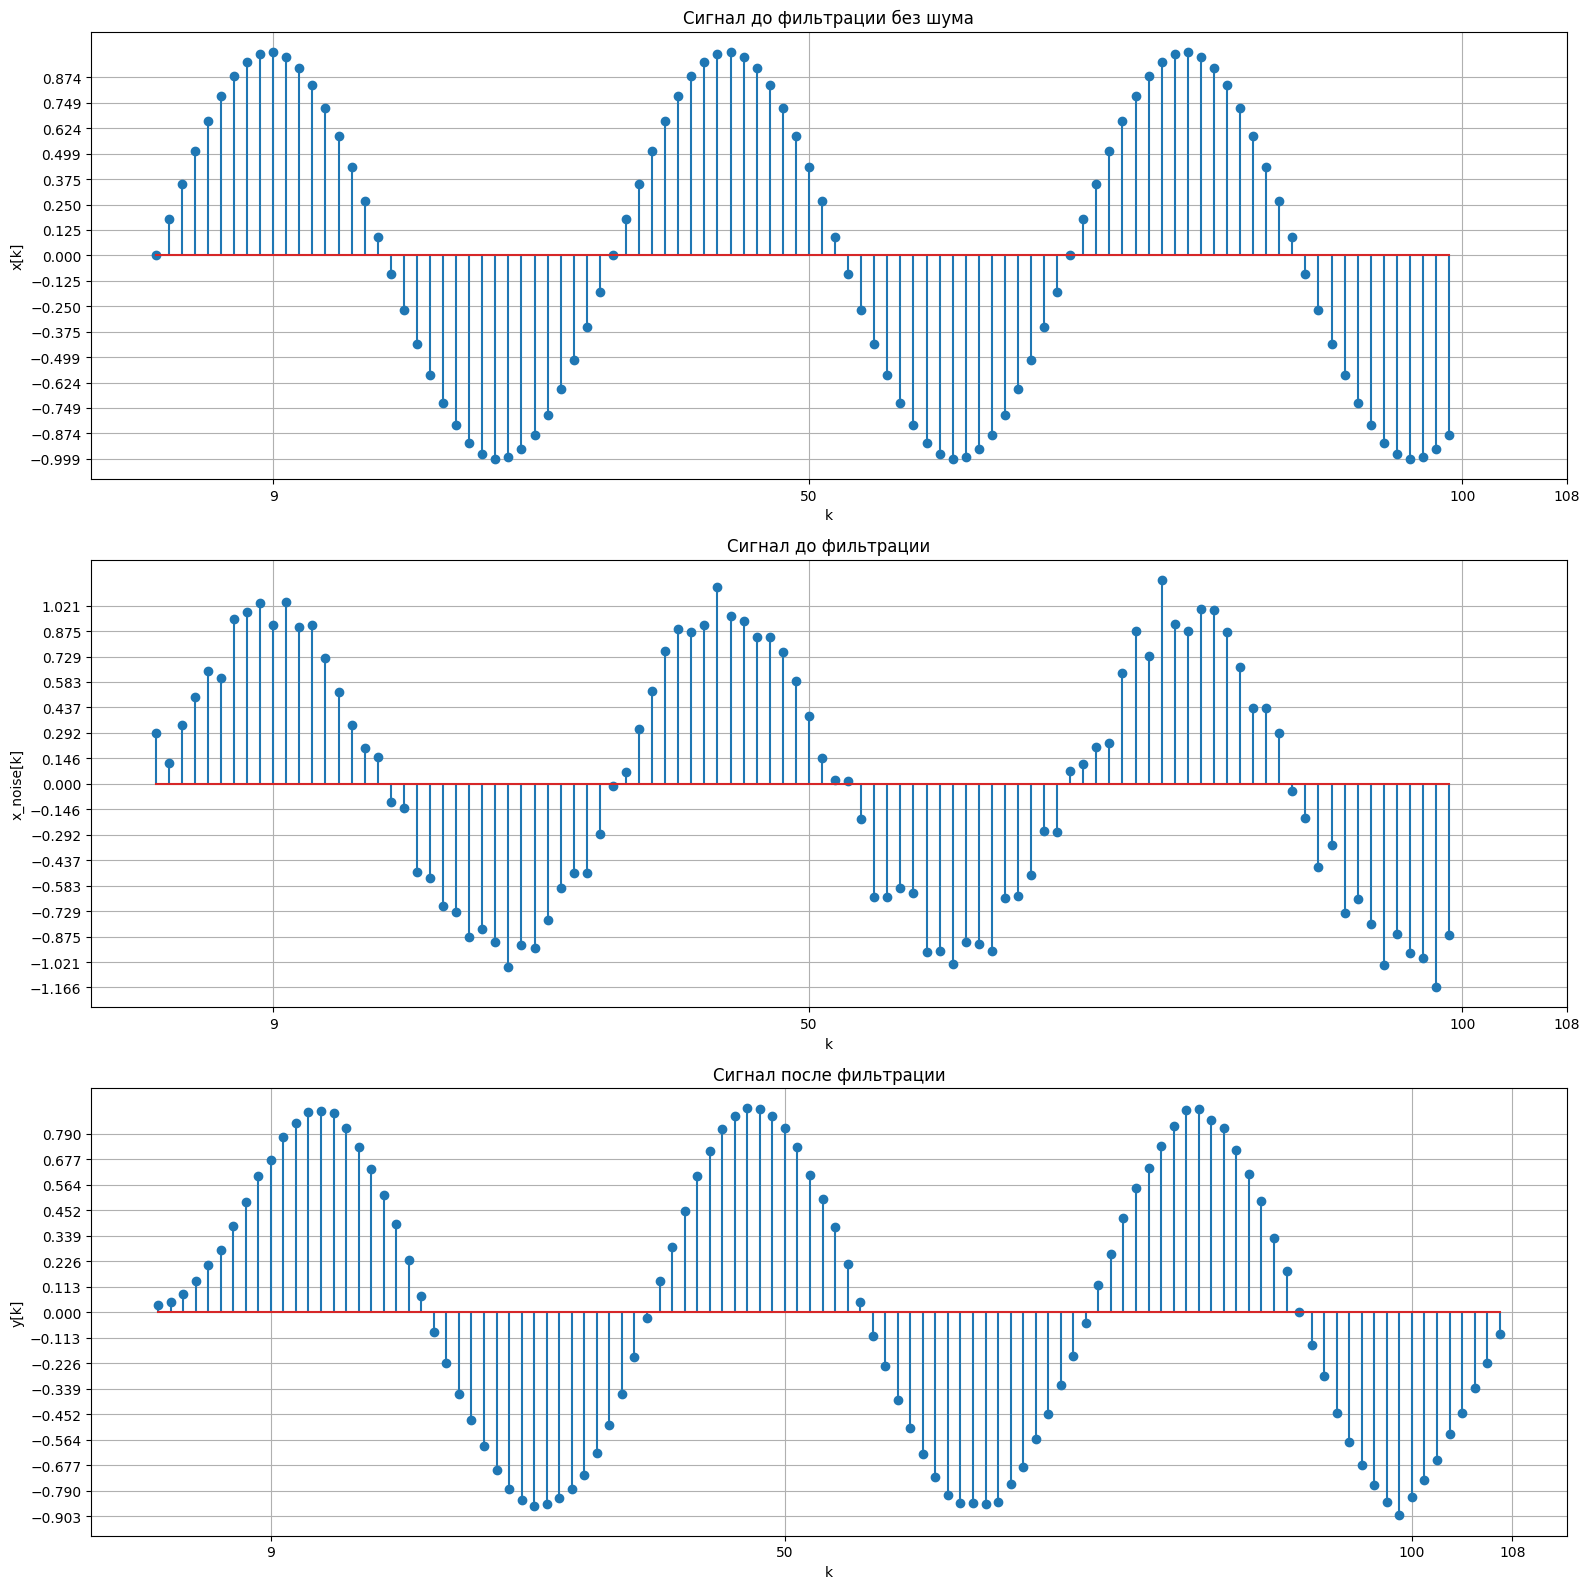

In [40]:
plot_signal(k, x, x_noise, y1, N, M1)

C:\Users\alexa\AppData\Local\Temp\ipykernel_1108\3645037644.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, x, use_line_collection=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_1108\3645037644.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, x_noise, use_line_collection=True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_1108\3645037644.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collecti

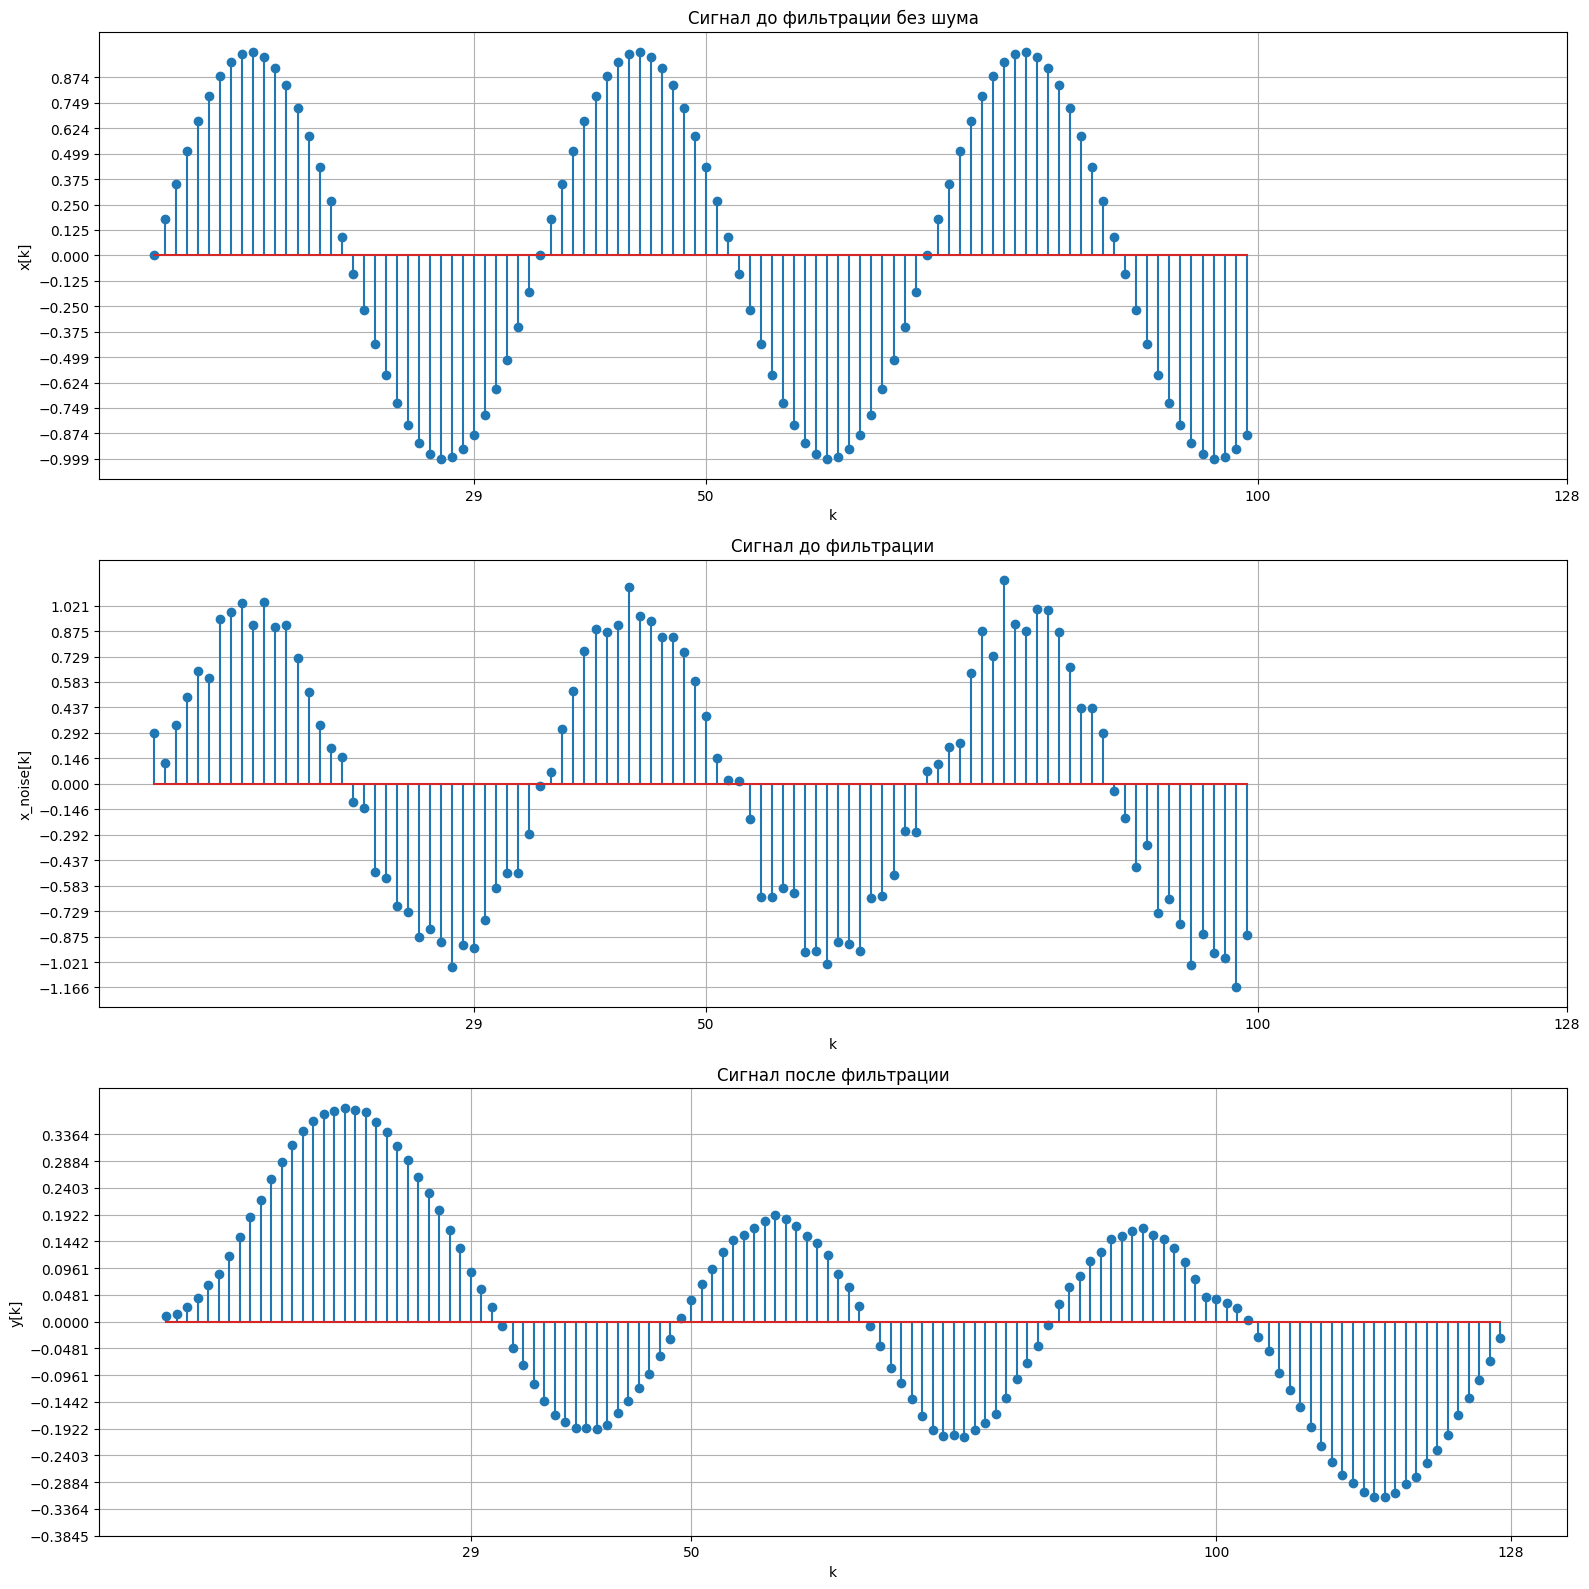

In [41]:
plot_signal(k, x, x_noise, y2, N, M2)

In [3]:
def dtft(x, M=2048):
    return np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

In [8]:
nu1, H1 = dtft(h1)
nu2, H2 = dtft(h2)

In [9]:
def AFC_PFC(nu, H, M):
    nu3, H3 = np.hstack([nu-1, nu, nu+1]), np.hstack([H, H, H])
    plt.figure(figsize=[9, 5])

    plt.subplot(2, 1, 1)
    plt.ylim([0, 1.1])
    plt.xlim([-1.5, 1.5])
    plt.xticks([-1.5, -1, -0.5, -1.0/M, 0, 1.0/M, 0.5, 1, 1.5],
              labels=('-1.5', '-1', '-0.5', '– $\\dfrac{1}{M}$', '0', 
                      '$\\dfrac{1}{M}$', '0.5', '1', '1.5'))
    plt.title('АЧХ и ФЧХ фильтра скользящего среднего, M=%i' %M)
    plt.plot(nu3, abs(H3), 'g')
    plt.xlabel("$\\nu$")
    plt.ylabel("$|H(\\nu)|$")
    plt.grid()
    plt.text(-1.4, 0.6, '$\dots$')
    plt.text(1.35, 0.6, '$\dots$')
    plt.subplot(2, 1, 2)
    plt.xlim([-1.5, 1.5])
    plt.plot(nu3, np.angle(H3))
    plt.ylabel("$\\varphi(\\nu)$")
    plt.xlabel("$\\nu$")
    plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
    plt.text(-1.4, -np.pi/2-0.1, '$\dots$')
    plt.text(1.35, np.pi/2+0.1, '$\dots$')
    plt.grid()
    plt.xticks([-1.5, -1, -0.5, -1.0/M, 0, 1.0/M, 0.5, 1, 1.5],
              labels=('-1.5', '-1', '-0.5', '– $\\dfrac{1}{M}$', '0', 
                      '$\\dfrac{1}{M}$', '0.5', '1', '1.5'))
    plt.tight_layout()

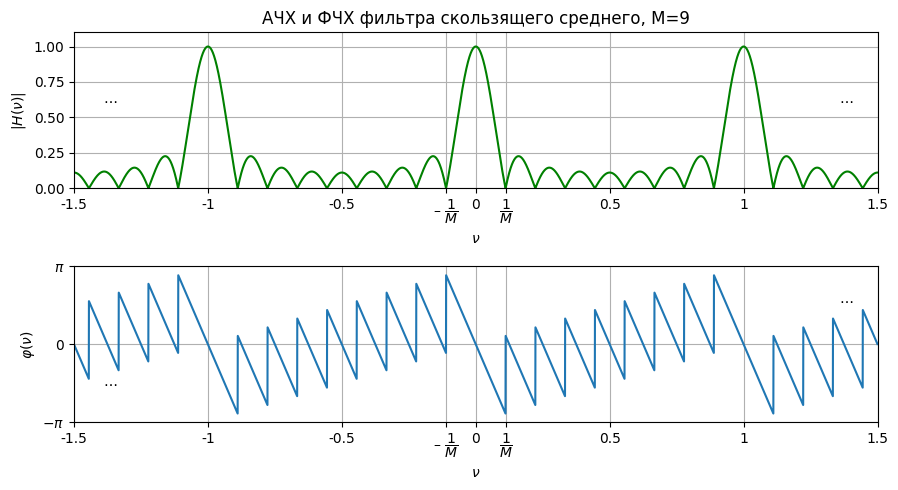

In [10]:
AFC_PFC(nu1, H1, M1)

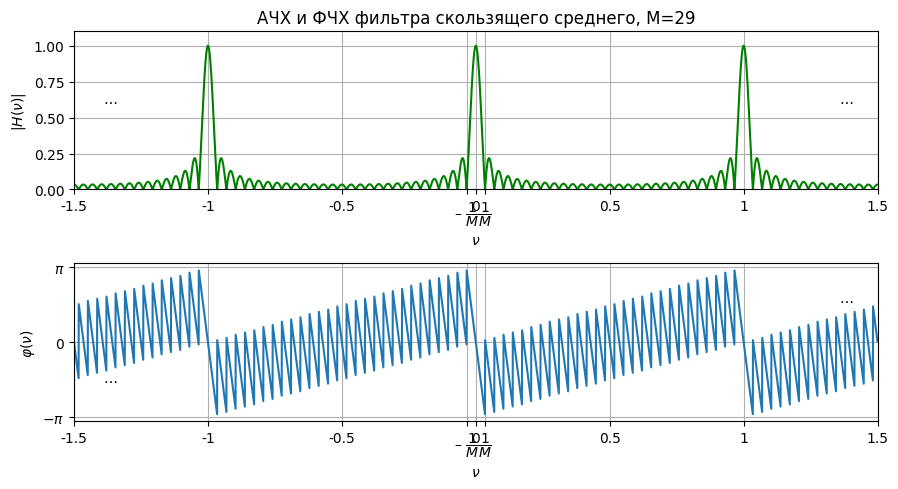

In [11]:
AFC_PFC(nu2, H2, M2)

## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

In [4]:
a = 1
b = 0.8
c = 0.5
M = 50
N = 180

In [5]:
A1 = a/(a+b+c)
B1 = b/(a+b+c)
C1 = c/(a+b+c)

h1 = np.zeros(3*N)
h1[0] = A1
h1[M] = B1
h1[2*M] = C1

In [6]:
A2 = 1/2
B2 = 1/2

h2 = np.zeros(3*N)
h2[0] = A1
h2[1] = B1

In [22]:
def wav_analysis(filename, time_delay=0, time_duration=0):
    
    Audio(filename)
    rate, sample = scipy.io.wavfile.read(filename)
    
    if time_duration == 0:
        time_duration = sample.size
        print("Defaults")

    print(f"Number of values:\t{sample.size}\nRate:\t{rate}\nDuration:\t{sample.size/rate}")
    print(f"Start:\t{time_delay}\nEnd:\t{time_delay + time_duration}")
    x = sample[time_delay:(time_delay+time_duration)]
    plt.figure(figsize=[8, 3])
    plt.plot(np.arange(x.size) / rate, x, 'm.')
    #plt.stem(np.arange(x.size)/fs, x, 'g', 'g.', use_line_collection=True)
    plt.xlabel(u'$t$, c')
    plt.ylabel(u'$x(t)$')
    plt.title(f'Сигнал {filename}, $f_d$={rate} Гц, $\Delta t=${1.0/rate:.6f}  c')
    plt.grid()
    return rate, x

In [51]:
name = 'hello0'
#name = 'piano10'

directory = './wav_files_lab2/wav_lab2/'
suffix = '.wav'
filename = f'{directory}{name}{suffix}'
Audio(filename)

In [52]:
fs, x = scipy.io.wavfile.read(filename)

y1 = signal.convolve(x, h1)
y2 = signal.convolve(y1, h2)
output1 = f'{directory}{name}_kaskad_1_2{suffix}'
scipy.io.wavfile.write(filename=output1, rate=fs, data=np.array(y2, dtype=np.int16))

In [53]:
Audio(output1)

In [54]:
z1 = signal.convolve(x, h2)
z2 = signal.convolve(z1, h1)
output2 = f'{directory}{name}_kaskad_2_1{suffix}'
scipy.io.wavfile.write(filename=output2, rate=fs, data=np.array(z2, dtype=np.int16))

In [55]:
Audio(output2)

Defaults
Number of values:	23183
Rate:	44100
Duration:	0.5256916099773242
Start:	0
End:	23183
Defaults
Number of values:	24261
Rate:	44100
Duration:	0.5501360544217687
Start:	0
End:	24261
Defaults
Number of values:	24261
Rate:	44100
Duration:	0.5501360544217687
Start:	0
End:	24261


(44100, array([48, 85, 75, ...,  0,  0,  0], dtype=int16))

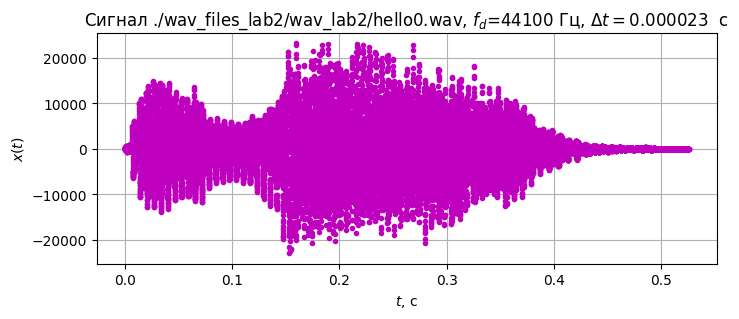

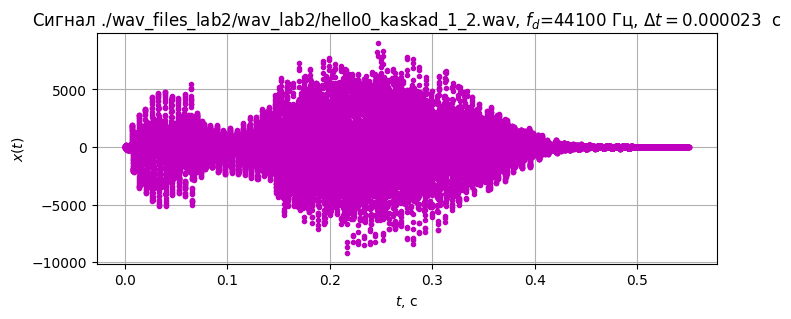

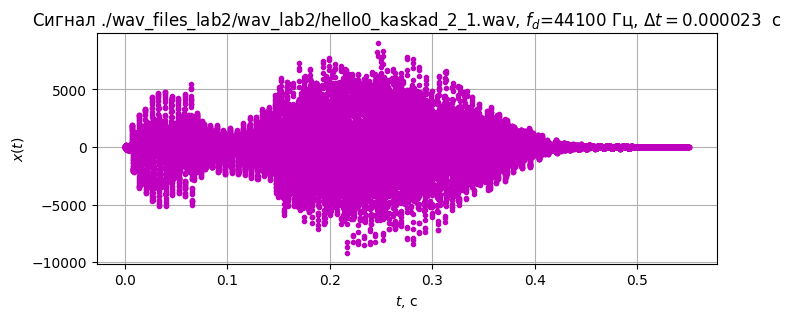

In [56]:
wav_analysis(filename)
wav_analysis(output1)
wav_analysis(output2)

# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

In [4]:
nu_c = 0.1
N = 30

In [5]:
def h(k, nu_c, N):
    if (k-N)!=0:
        return np.sin(2*np.pi*nu_c*(k-N))/(np.pi*(k-N))
    return 2*nu_c

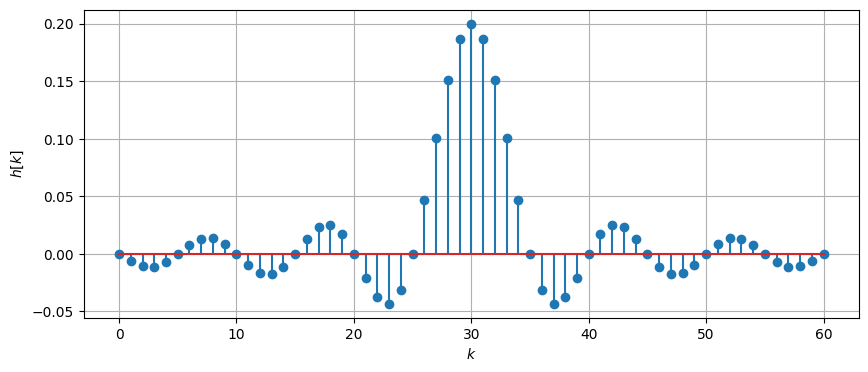

In [6]:
k = np.arange(0, 2*N+1, 1)
h = np.array([h(k1, nu_c, N) for k1 in k])

fig = plt.figure(figsize=[10, 4])
fig.patch.set_facecolor('white')
plt.stem(k, h)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.grid()
plt.show()

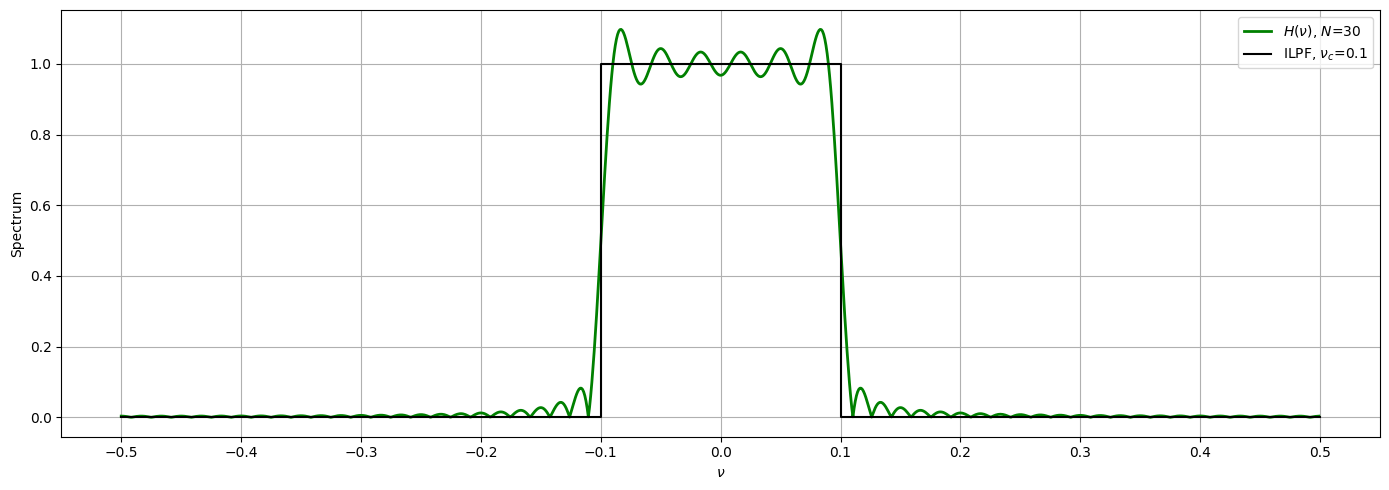

In [7]:
fig, ax = plt.subplots(figsize=(14, 5))
fig.patch.set_facecolor('white')

nu, H = dtft(h, M=2**10)
ax=plt.subplot(1, 1, 1)
plt.plot(nu, abs(H), lw = 2, color="g", label = f'$H(\\nu)$, $N$={N}')
plt.step([-0.5, -nu_c, 0, nu_c, 0.5], [0, 0, 1, 1, 0], color='k', label = f'ILPF, $\\nu_c$={nu_c}')
plt.xlabel("$\\nu$")
plt.ylabel("Spectrum")
plt.legend(loc="best")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.grid()

plt.tight_layout()
plt.show()

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [45]:
import numpy as np
import matplotlib.pyplot as plt 
def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15]
    amp1 = [1,  0, 0.2, 1, 1, 0.6]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

Пример вывода задания для первого варианта.

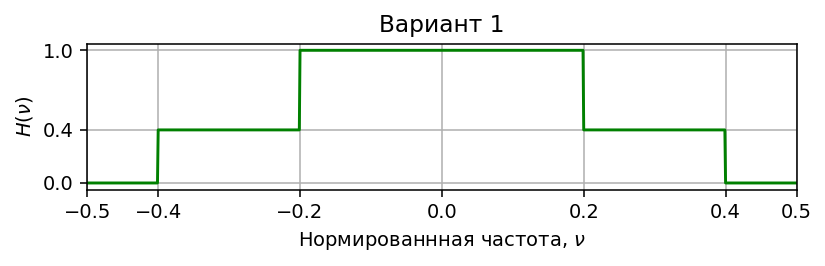

In [46]:
task_3_2(variant=1)

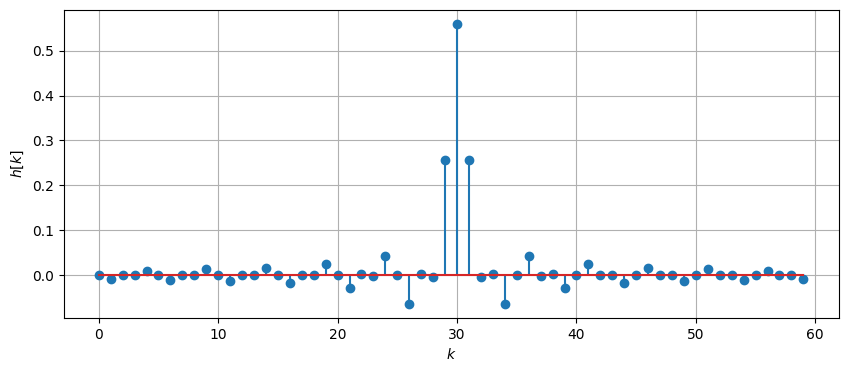

In [8]:
N=30

def h(k, N):
    n = k-N
    if n == 0:
        return (4*2*0.4 + 6*2*0.2)/10
    return ( 4*np.sin(2*np.pi*0.4*n) + 6*np.sin(2*np.pi*0.2*n) ) / ( 10*np.pi*n )

k = np.arange(0, 2*N, 1)
h = np.array([h(k1, N) for k1 in k])

fig = plt.figure(figsize=[10, 4])
fig.patch.set_facecolor('white')
plt.stem(k, h)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.grid()
plt.show()


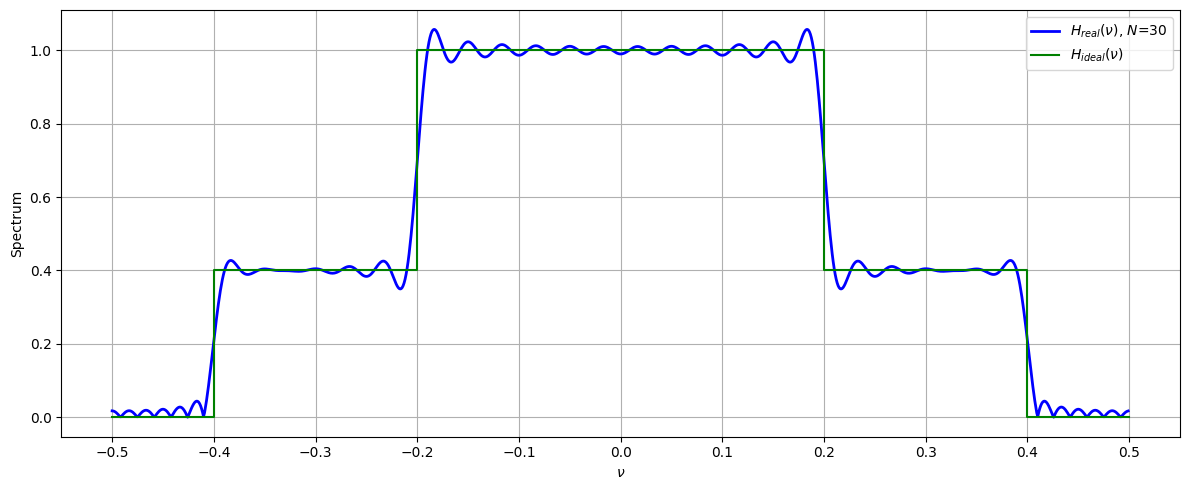

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.patch.set_facecolor('white')

nu, H = dtft(h, M=2**10)
ax=plt.subplot(1, 1, 1)
plt.plot(nu, abs(H), lw = 2, color="b", label = f'$H_{{real}}(\\nu)$, $N$={N}')
plt.step([-0.5, -0.4, -0.2, 0, 0.2, 0.4, 0.5], [0, 0, 0.4, 1, 1, 0.4, 0], color='g', label = f'$H_{{ideal}}(\\nu)$')
plt.xlabel("$\\nu$")
plt.ylabel("Spectrum")
plt.legend(loc="best")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.grid()

plt.tight_layout()
plt.show()